# 用于AI的高级随机技术——模拟试验

<!-- Advanced Randomness Techniques for Game AI -->

![](https://img.shields.io/badge/作者-jskyzero-brightgreen.svg?style=flat)
![](https://img.shields.io/badge/日期-2021/09/07-brightgreen.svg?style=flat)



一些绘图与模拟，Powered By Python, Conda, Jypyter, Matplotlib...

In [47]:
import numpy as np # for multidimensional array object
import matplotlib.pyplot as plt # for visualizations
from scipy import stats # for efficient numerical routines
from collections import Counter
import random # for random
import math # for radians cos sin


random.seed(0)
plt.rcParams['font.sans-serif'] = ['SimHei']

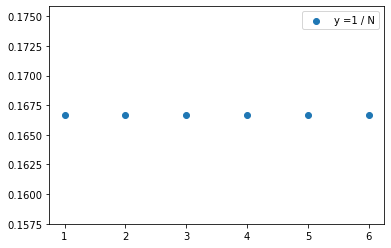

In [2]:
# PDF：离散均等概率

xvals = np.arange(1, 7, 1)
yvals = np.vectorize(lambda x : 1/6)(xvals)


plt.scatter(xvals, yvals, label="y =1 / N")
plt.legend() # 设置label位置

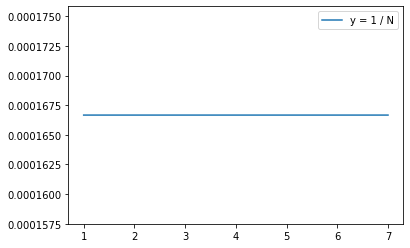

In [3]:
# PDF：连续均等概率

xvals = np.arange(1, 7, 0.001)
yvals = np.vectorize(lambda x : 1/len(xvals))(xvals)

plt.plot(xvals, yvals, label="y = 1 / N")
plt.legend()

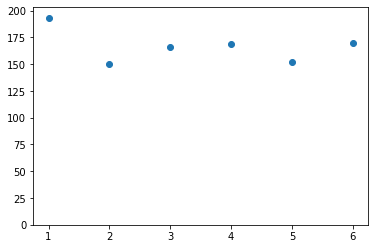

In [4]:
# 模拟，1000次随机1-6的分布
xvals = np.arange(0, 1000, 1)
yfunction = lambda x : random.randint(1,6)
yvals = np.vectorize(yfunction)(xvals)

w = Counter(yvals)
plt.ylim([0, max(w.values()) + 10])
plt.scatter(w.keys(), w.values())

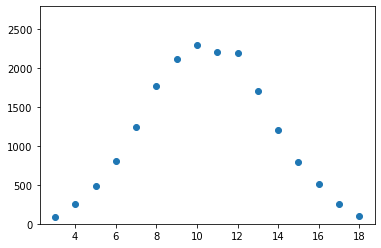

In [5]:
# 模拟，1000*6*3次“随机3次1-6的和”分布
xvals = np.arange(0, 1000*6*3, 1)
yfunction1 = lambda x : random.randint(1,6)
yfunction2 = lambda x : sum(map(yfunction1, range(0,3)))

yvals = np.vectorize(yfunction2)(xvals)
w = Counter(yvals)

plt.ylim([0, max(w.values()) + 500])
plt.scatter(w.keys(), w.values())

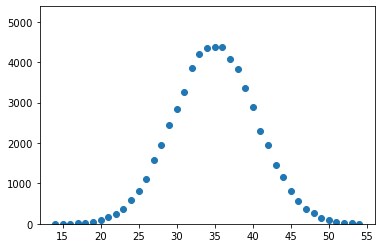

In [6]:
# 模拟，1000*6*10次“随机10次1-6的和”分布
xvals = np.arange(0, 1000*6*10, 1)
yfunction1 = lambda x : random.randint(1,6)
yfunction2 = lambda x : sum(map(yfunction1, range(0,10)))


yvals = np.vectorize(yfunction2)(xvals)
w = Counter(yvals)

plt.ylim([0, max(w.values()) + 1000])
plt.scatter(w.keys(), w.values())

In [69]:
# 画点 和三个圆
def draw_points(xvals, yvals, title = "", center = (5,5)):
  # set size
  plt.figure(figsize=(3,3))
  # add circle
  for length, color in zip([5/3,10/3,15/3],['r','y','b']):
    circle = plt.Circle(center, length, color=color, fill=False)
    plt.gca().add_patch(circle)
  # add title
  plt.title(title)
  # draw points
  plt.scatter(xvals, yvals)
  plt.show()

# 极坐标转平面直角坐标系
def to_point(degress, radius, center = (5,5)):
  radians = math.radians(degress)
  points = (radius * math.cos(radians), 
            radius * math.sin(radians))
  return (points[0] + center[0], points[1] + center[1])

# # frompyfunc
# add_1 = np.frompyfunc(lambda x : (90, 1), 1, 1)
# add_2 = np.frompyfunc(lambda x : to_point(*x), 1, 1)
# # zip
# list(zip(*add_2(add_1([1,2,3]))))

# 用指定方法生成指定次数的点，然后画出来
def produce_and_draw(get_point, size):
  xvals, yvals = np.vectorize(lambda x : to_point(*get_point(x)))(np.arange(0, size, 1))
  title = "{times}次".format(times = size)
  draw_points(xvals, yvals,title)


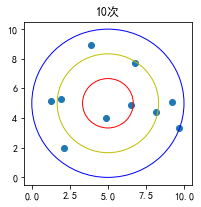

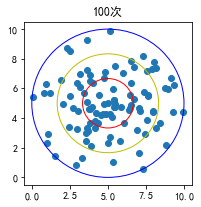

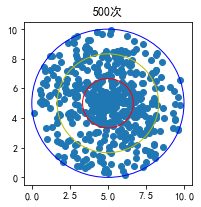

In [70]:
pure_random = lambda x : (
  random.random() * 360, # 均匀分布
  random.random() * 5 # 均匀分布
)

for x in [10, 100, 500]:
  produce_and_draw(pure_random, x)

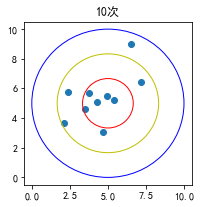

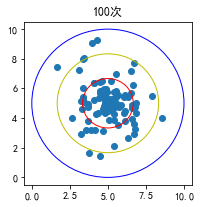

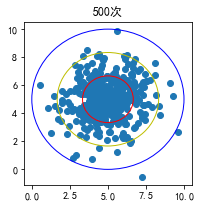

In [76]:
pure_random = lambda x : (
  random.random() * 360, # 均匀分布
  abs(random.gauss(0, 5/3)) # 高斯分布
)

for x in [10, 100, 500]:
  produce_and_draw(pure_random, x)

## 若干参考

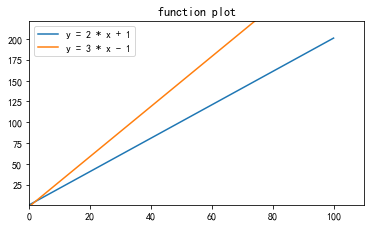

In [79]:
# 画图

xvals = np.arange(0, 100, 0.01)
yvals = np.vectorize(lambda x : 2 * x + 1)(xvals)
yvals2 = np.vectorize(lambda x : 3 * x - 1)(xvals)
# 调整比例
plt.figure(figsize=(6,6/16*9))
# 调整坐标轴 
plt.xlim(xvals.min()*1.1, xvals.max()*1.1)
plt.ylim(yvals.min()*1.1, yvals.max()*1.1)
plt.title("function plot")
# 画图
plt.plot(xvals, yvals, label="y = 2 * x + 1")
plt.plot(xvals, yvals2, label="y = 3 * x - 1")
# 设置label位置
plt.legend(loc="upper left")

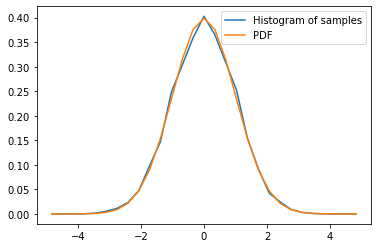

In [8]:
# 正态分布

# Sample from a normal distribution using numpy's random number generator
samples = np.random.normal(size=10000)

# Compute a histogram of the sample
bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(samples, bins=bins, density=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])

# Compute the PDF on the bin centers from scipy distribution object

pdf = stats.norm.pdf(bin_centers)


plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()